2. 2005-2009: Rise of E-commerce and Strengthening of Discount Stores

Main Competitors: Target, Costco, Amazon (as a rising threat)
Focus Areas:

E-commerce investments and growth of online sales
Price competition and customer acquisition strategies of discount stores
Walmart's adaptation to e-commerce and development of multi-channel strategies

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas.tseries.offsets import BDay, CustomBusinessDay

In [2]:
tickers = tickers = ["WMT", "GC=F", "SI=F", "^NYA", "^IXIC", "CL=F", "TGT", "COST", "AMZN"]  
# WMT: Walmart, GC=F: Gold, SI=F: Silver, ^NYA: NYSE Composite, ^IXIC: Nasdaq Composite, 
#CL=F: WTI Petrol, TGT: Target, COST: Costco, AMZN: Amazon

start_date="2005-01-01"
end_date="2009-12-31"
data={}

for ticker in tickers:
    try:
        df_temp = yf.download(ticker,start=start_date,end=end_date)
        df_temp.reset_index(inplace=True)
           
        df_temp["Date"]=df_temp["Date"]  

        data[ticker] = df_temp["Close"]

    except Exception as e:
        print()

df_combined=pd.concat(data.values(), axis=1)

df_combined.columns=data.keys()   


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_combined["Date"]=df_temp["Date"]

In [4]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WMT     1258 non-null   float64       
 1   GC=F    1254 non-null   float64       
 2   SI=F    1255 non-null   float64       
 3   ^NYA    1258 non-null   float64       
 4   ^IXIC   1258 non-null   float64       
 5   CL=F    1257 non-null   float64       
 6   TGT     1258 non-null   float64       
 7   COST    1258 non-null   float64       
 8   AMZN    1258 non-null   float64       
 9   Date    1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 98.4 KB


In [5]:
df_combined.describe()

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN
count,1258.000000,1254.000000,1255.000000,1258.000000,1258.000000,1257.000000,1258.000000,1258.000000,1258.000000
mean,11.428117,719.199203,12.393828,7897.585981,2189.199390,71.470024,32.922606,37.790105,3.000082
std,1.086100,196.819027,3.399765,1403.490489,318.841507,21.725372,5.268799,5.895343,1.236539
min,9.506912,412.600006,6.427000,4226.310059,1268.640015,33.869999,16.713699,27.103743,1.303500
25%,10.628037,572.324997,9.805000,7090.002563,2055.640015,58.570000,30.886775,33.197256,1.899750
50%,11.111547,674.450012,12.823000,8032.709961,2217.479980,66.080002,33.546076,36.963224,2.571250
75%,11.990613,899.649994,14.254500,9073.840088,2415.710083,76.940002,36.391430,42.136464,3.935500
max,14.852932,1217.400024,20.684999,10311.610352,2859.120117,145.289993,45.124084,52.160645,7.112500


In [6]:
changes=df_combined.iloc[:,:-1].pct_change()
changes=changes*100
changes

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.243686,-0.046656,-0.771965,-1.242250,-2.057933,4.249765,-1.081093,-1.795456,-5.345910
2,0.131554,-0.443406,1.322546,-0.497990,-0.788483,-1.184242,0.078057,0.382641,-0.878030
3,1.426128,-1.312707,-1.213145,0.307999,-0.059294,5.001157,-5.421198,1.440130,-1.723726
4,-0.111012,-0.498814,-0.062182,-0.274556,-0.066502,-0.285340,1.072178,-0.856008,3.093785
...,...,...,...,...,...,...,...,...,...
1253,-0.037511,-0.501367,-2.576524,0.459621,0.753327,1.799928,0.123015,0.839367,3.880374
1254,0.525168,0.000000,-1.825524,0.523746,0.707163,0.922477,-0.409425,0.549362,-0.338275
1255,0.708935,0.000000,0.000000,0.086013,0.235821,0.126960,-0.411132,0.264854,0.606627
1256,0.240811,0.000000,0.000000,-0.124638,-0.116983,0.519838,0.268336,-0.495354,0.071784


In [7]:
changes.describe()

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.018186,0.083959,0.104251,0.013437,0.017526,0.088497,0.027587,0.037703,0.138510
std,1.420211,1.385587,2.377561,1.596231,1.584313,2.772351,2.377371,1.761383,3.175004
min,-8.063945,-7.300591,-13.718183,-9.725992,-9.142419,-12.247840,-12.500000,-11.902777,-21.821972
25%,-0.738668,-0.567398,-0.971395,-0.550084,-0.662338,-1.375215,-1.111314,-0.899819,-1.328171
50%,0.019690,0.084832,0.239746,0.077206,0.082316,0.129526,-0.017263,0.000000,-0.056999
75%,0.682093,0.834075,1.384109,0.643644,0.697149,1.539247,1.081103,0.938737,1.483052
max,11.073039,9.027685,12.970713,12.216238,11.805930,17.832894,17.803650,10.751470,26.949729


<Axes: >

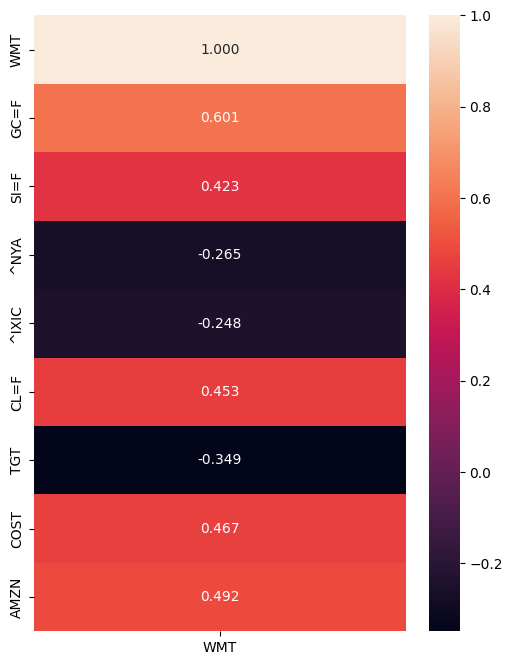

In [8]:
df=df_combined
corr_matrix=df.iloc[:,:-1].corr()
plt.figure(figsize=(6,8))
sns.heatmap(data=corr_matrix["WMT"].to_frame(),annot=True,fmt=".3f")

<Axes: xlabel='Date', ylabel='WMT'>

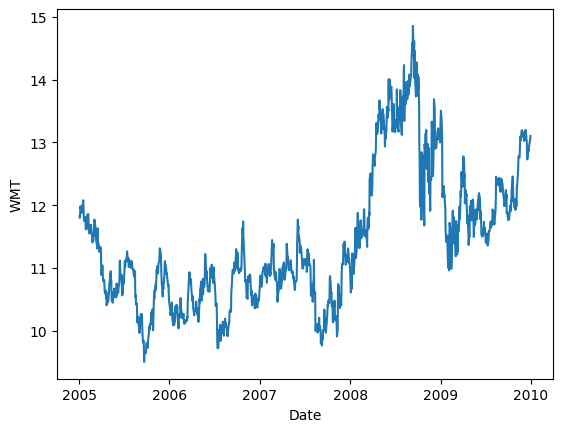

In [9]:
sns.lineplot(x="Date",y="WMT",data=df)

Hurricane Katrina
23-31 Ag 2005

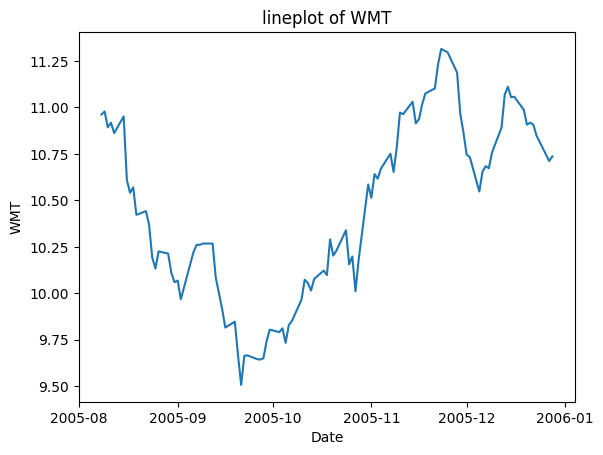

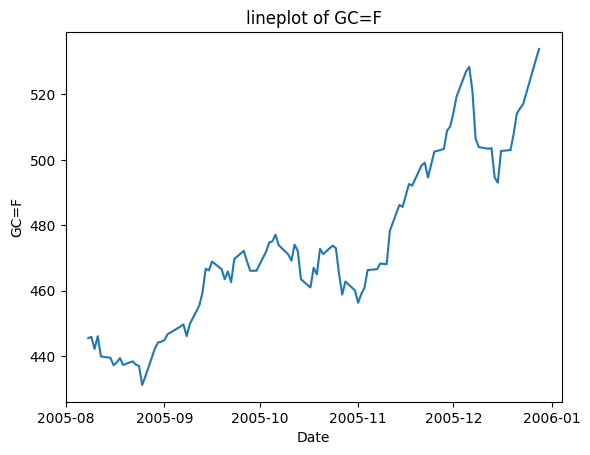

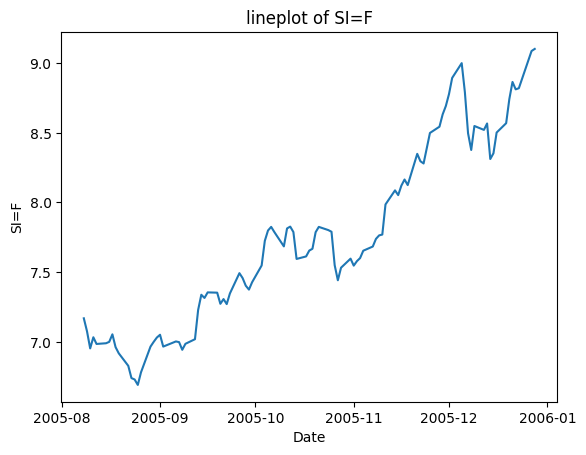

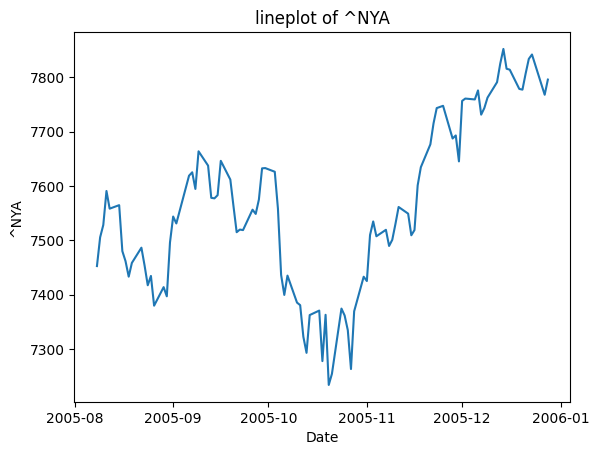

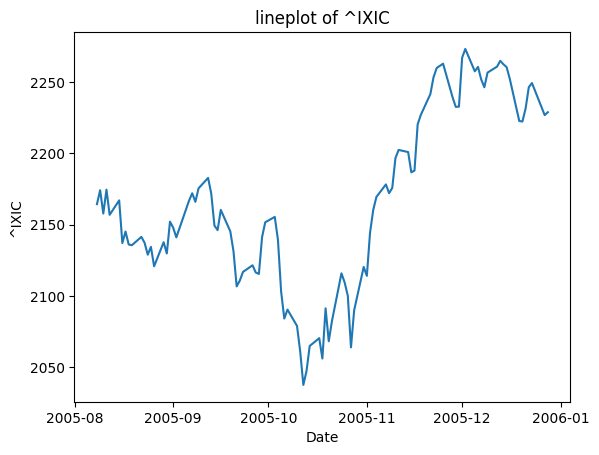

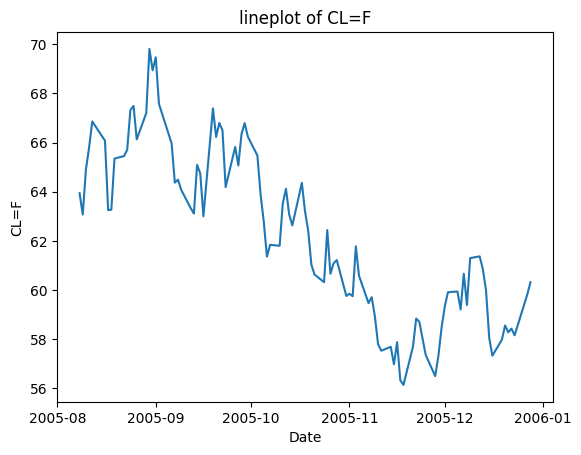

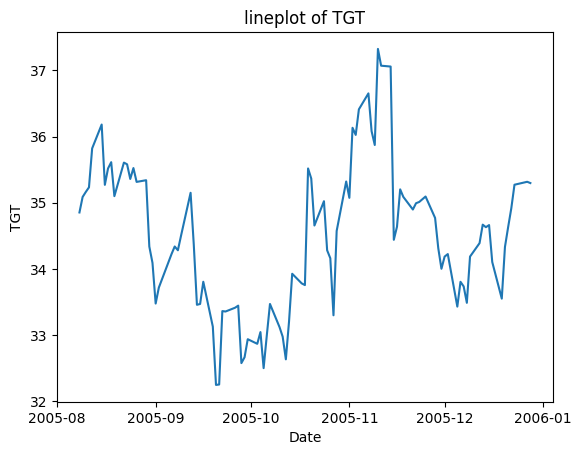

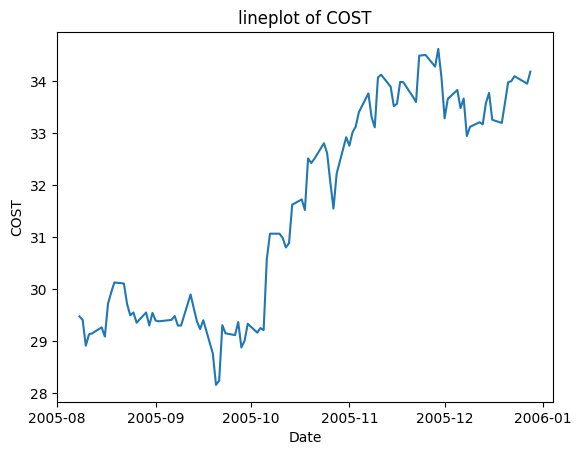

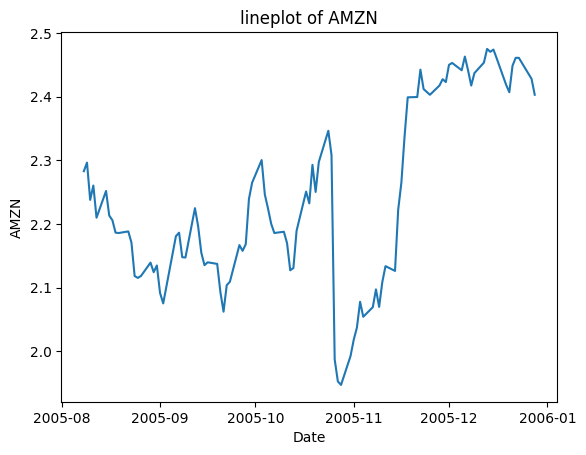

In [10]:
for i in df.iloc[150:250,:-1]:
    plt.figure()
    sns.lineplot(x=df["Date"].iloc[150:250],y=i,data=df[150:250])
    plt.title(f"lineplot of {i}")

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WMT     1258 non-null   float64       
 1   GC=F    1254 non-null   float64       
 2   SI=F    1255 non-null   float64       
 3   ^NYA    1258 non-null   float64       
 4   ^IXIC   1258 non-null   float64       
 5   CL=F    1257 non-null   float64       
 6   TGT     1258 non-null   float64       
 7   COST    1258 non-null   float64       
 8   AMZN    1258 non-null   float64       
 9   Date    1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 98.4 KB


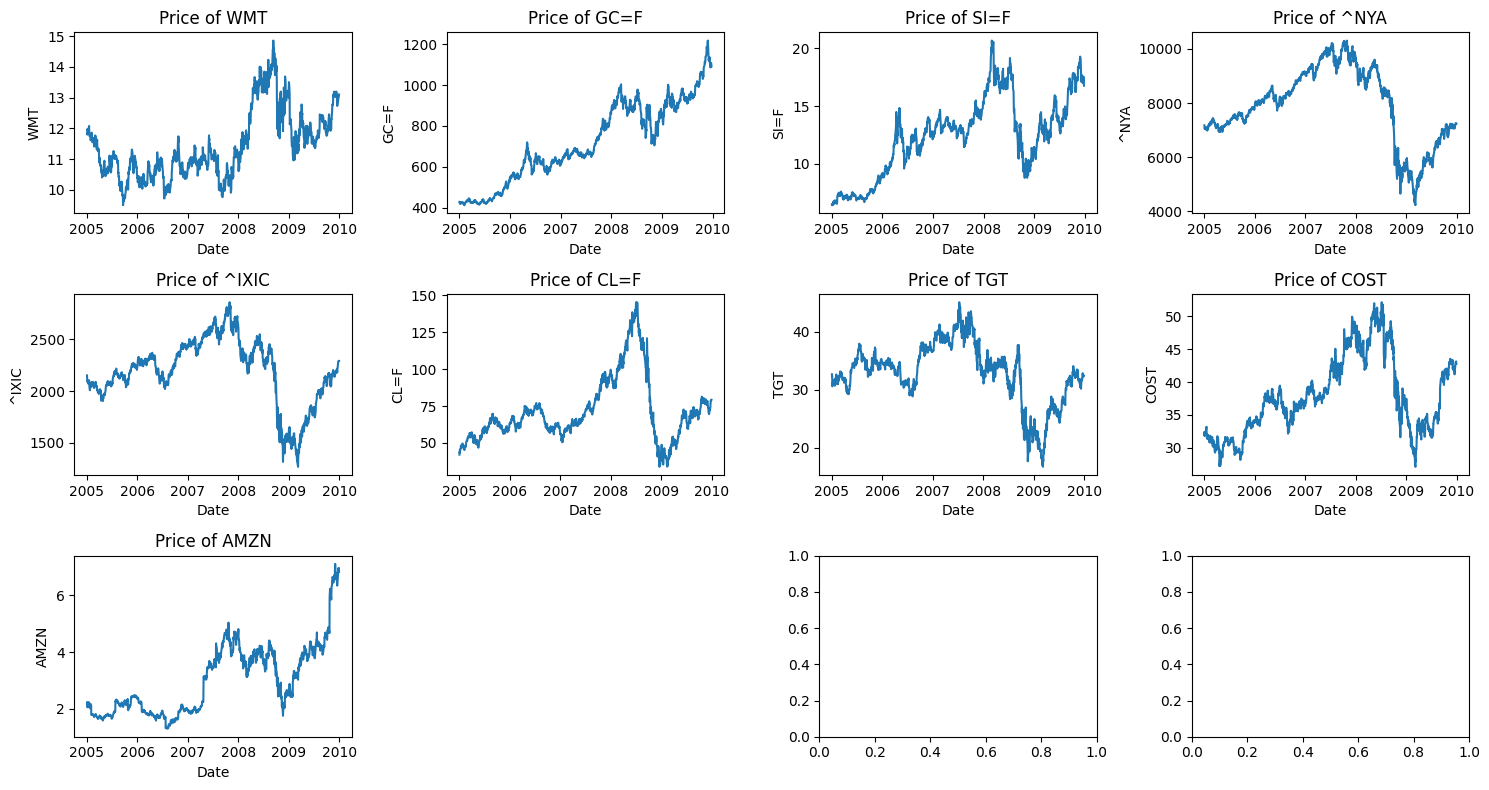

In [12]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15, 8))  
for i, ax in zip(df.iloc[:,:-1].columns,axes.flatten()):
    sns.lineplot(data=df,x="Date",y=i,ax=ax)
    ax.set_title(f"Price of {i}")

if len(df.iloc[:, :-1].columns) < 10:
    fig.delaxes(axes.flatten()[len(df.iloc[:, :-1].columns)])

plt.tight_layout()

plt.show()

During the 2008 financial crisis, many investment instruments experienced significant losses, while Walmart (WMT) stock performance stood out. In the fourth quarter of 2008, Walmart's net sales were recorded at 106,269 billion dollars, showing an 8.3% increase compared to the same period the previous year.

In [13]:
for i in df.iloc[:,:-1]:
    volatility=df[i].std()
    print(f"Volatility of {i} : {volatility:.5f}")

Volatility of WMT : 1.08610
Volatility of GC=F : 196.81903
Volatility of SI=F : 3.39977
Volatility of ^NYA : 1403.49049
Volatility of ^IXIC : 318.84151
Volatility of CL=F : 21.72537
Volatility of TGT : 5.26880
Volatility of COST : 5.89534
Volatility of AMZN : 1.23654


In [14]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

df["month_sin"]=np.sin(2*np.pi*df["month"] / 12)
df["month_cos"]=np.cos(2*np.pi*df["month"] / 12)

df["day_sin"]=np.sin(2*np.pi*df["day"] / 31)
df["day_cos"]=np.cos(2*np.pi*df["day"] / 31)

df["year_sin"]=np.sin(2*np.pi*df["year"])
df["year_cos"]=np.cos(2*np.pi*df["year"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   WMT        1258 non-null   float64       
 1   GC=F       1254 non-null   float64       
 2   SI=F       1255 non-null   float64       
 3   ^NYA       1258 non-null   float64       
 4   ^IXIC      1258 non-null   float64       
 5   CL=F       1257 non-null   float64       
 6   TGT        1258 non-null   float64       
 7   COST       1258 non-null   float64       
 8   AMZN       1258 non-null   float64       
 9   Date       1258 non-null   datetime64[ns]
 10  year       1258 non-null   int64         
 11  month      1258 non-null   int64         
 12  day        1258 non-null   int64         
 13  month_sin  1258 non-null   float64       
 14  month_cos  1258 non-null   float64       
 15  day_sin    1258 non-null   float64       
 16  day_cos    1258 non-null   float64       


In [16]:
df.iloc[:,:-9].skew()

C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_18860\3365691764.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:,:-9].skew()


WMT      0.779100
GC=F     0.131582
SI=F    -0.014245
^NYA    -0.393301
^IXIC   -0.605662
CL=F     1.274606
TGT     -0.657970
COST     0.459345
AMZN     0.815608
dtype: float64

In [17]:
df.fillna(method='ffill', inplace=True)

from scipy.stats import zscore
z_scores=zscore(df.iloc[:,:-10])
z_scores

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN
0,0.366762,-1.476557,-1.742761,-0.511697,-0.116247,-1.352248,-0.043972,-0.920770,-0.626256
1,0.340217,-1.477570,-1.757463,-0.575271,-0.255210,-1.269794,-0.111077,-1.019376,-0.722530
2,0.354512,-1.487188,-1.732471,-0.600439,-0.307358,-1.293747,-0.106284,-0.998739,-0.737497
3,0.509687,-1.515536,-1.755699,-0.584950,-0.311248,-1.193790,-0.439406,-0.920770,-0.766622
4,0.497436,-1.526167,-1.756875,-0.598800,-0.315609,-1.199778,-0.377094,-0.967782,-0.715249
...,...,...,...,...,...,...,...,...,...
1253,1.323373,1.878668,1.378004,-0.484974,0.252390,0.302810,-0.069397,0.851068,3.193177
1254,1.385604,1.878668,1.286269,-0.458031,0.302749,0.335976,-0.094707,0.890972,3.174164
1255,1.470052,1.878668,1.286269,-0.453583,0.319661,0.340582,-0.120018,0.910316,3.208143
1256,1.498941,1.878668,1.286269,-0.460034,0.311252,0.359468,-0.103566,0.874041,3.212189


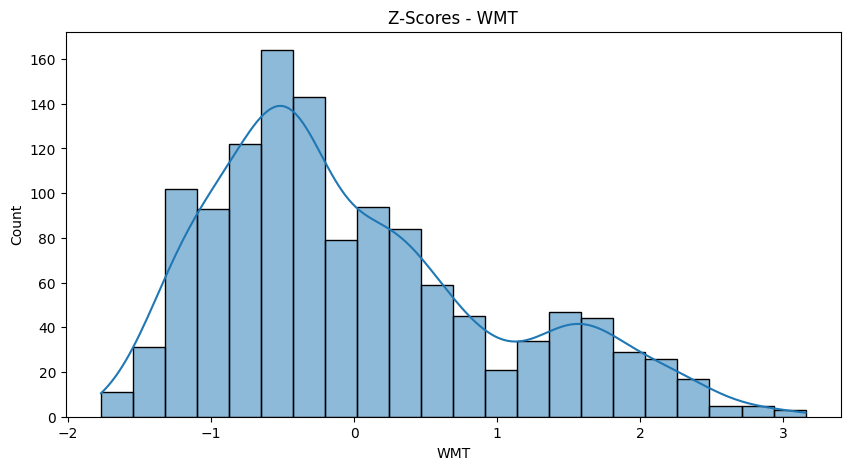

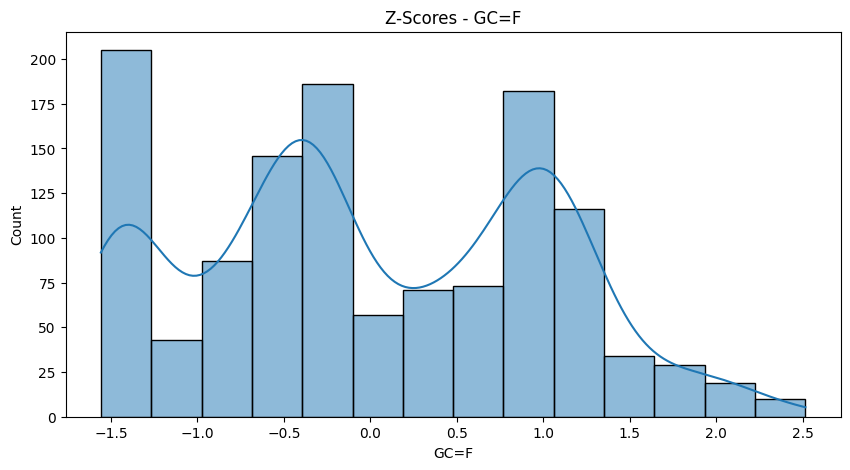

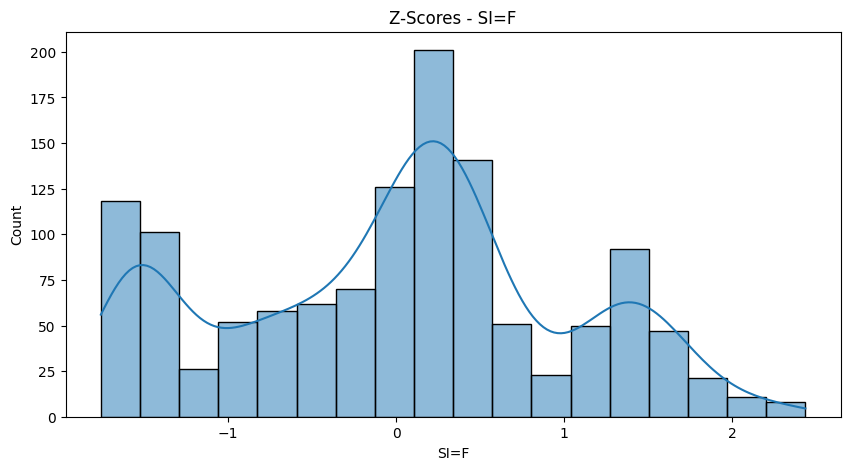

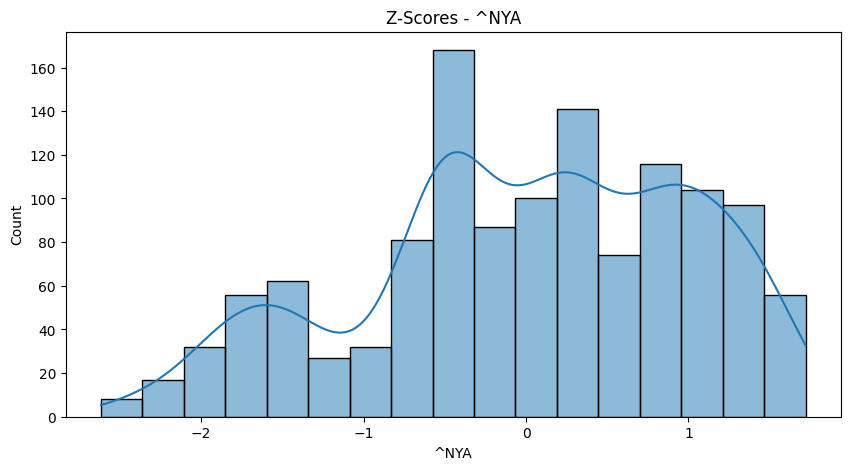

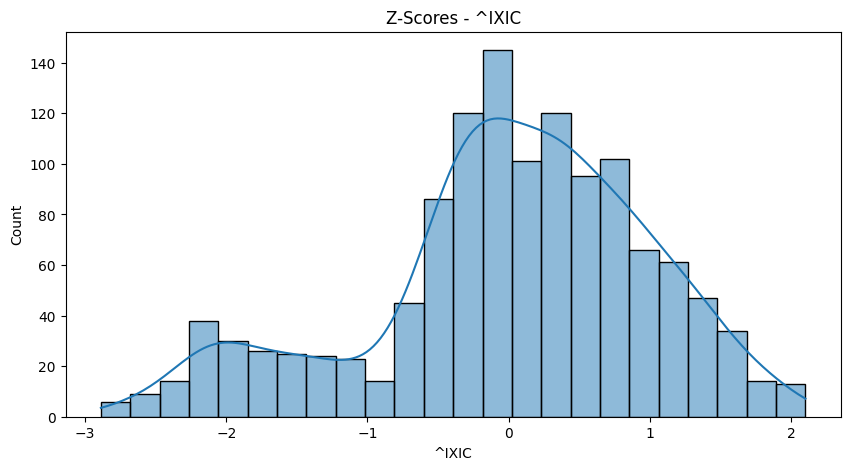

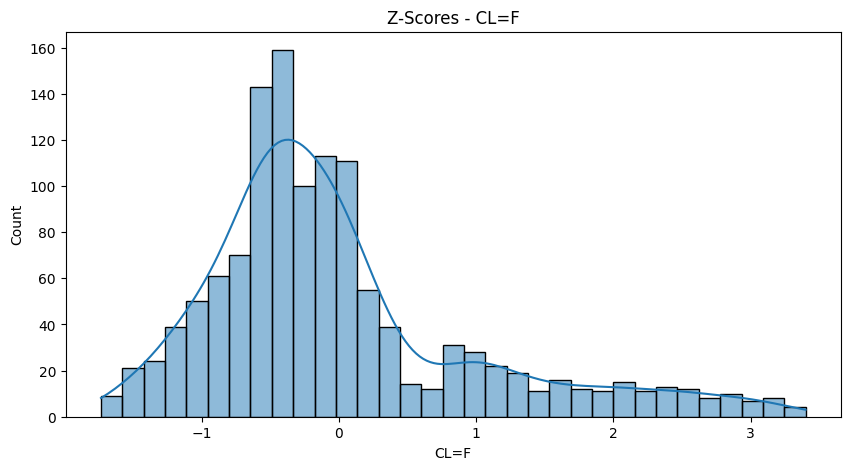

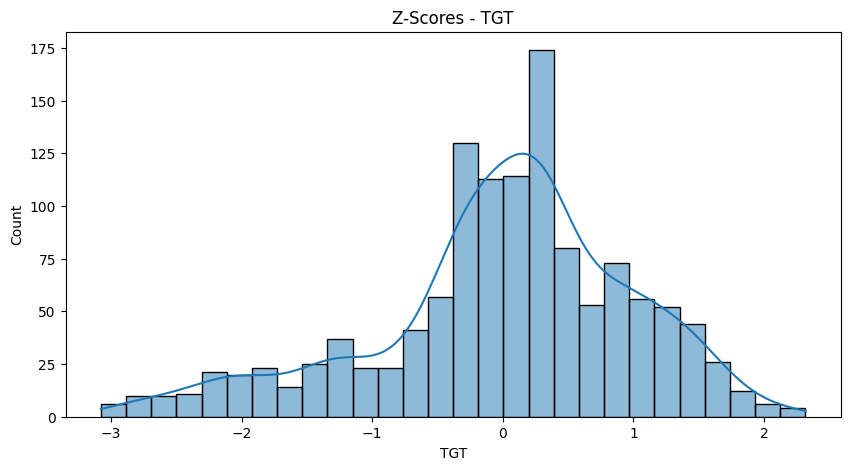

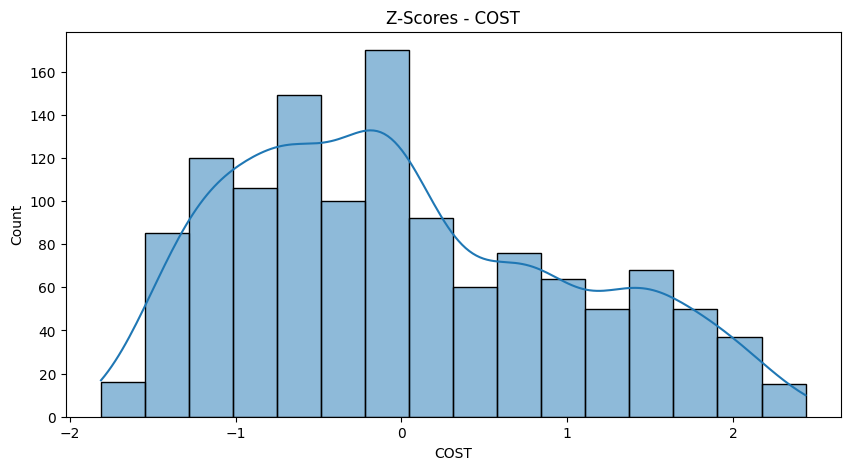

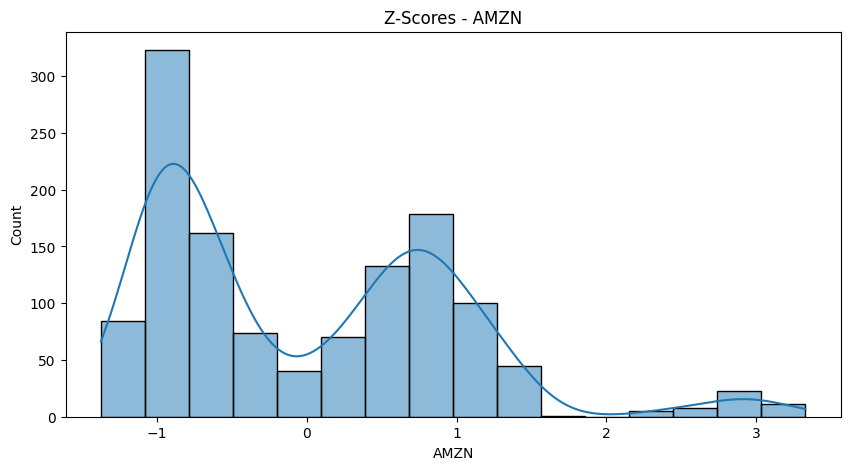

In [18]:
for column_name, i in z_scores.items():
    plt.figure(figsize=(10, 5)) 
    sns.histplot(data=i, kde=True) 
    plt.title(f"Z-Scores - {column_name}")
    plt.show()

In [19]:
df["daily_returns"]=df["WMT"].pct_change()
window_size=30 
df["rolling_volatility"]=df["daily_returns"].rolling(window=window_size).std()

In [20]:
df["lag_1"]=df["WMT"].shift(1)
df["lag_2"]=df["WMT"].shift(2)
df["log_volatility"]=np.log(df["rolling_volatility"]+1)

df["rolling_mean_30"]=df["WMT"].rolling(window=30).mean()
df["rolling_mean_60"]=df["WMT"].rolling(window=60).mean()
df["lag_3"]=df["WMT"].shift(3)
df["lag_5"]=df["WMT"].shift(5)

In [21]:
df.fillna(method='bfill', inplace=True)


C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_18860\1539852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()
C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

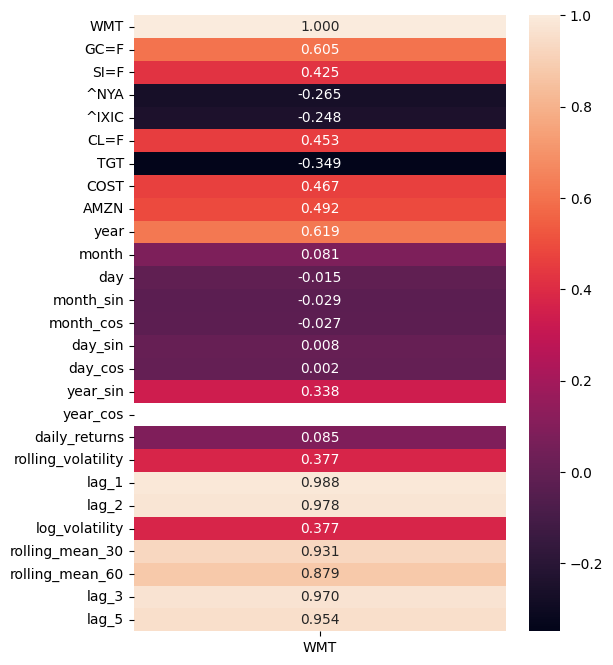

In [22]:
corr_matrix=df.corr()
plt.figure(figsize=(6,8))
sns.heatmap(data=corr_matrix["WMT"].to_frame(),annot=True,fmt=".3f")

In [23]:
drops=["lag_5","lag_3","rolling_mean_30","rolling_mean_60","lag_2","lag_1","year_cos","day_cos","day_sin",
      "month_cos","month_sin","day","month"]
df.drop(columns=drops,axis=1,inplace=True)

In [24]:
df.drop(columns="Date",axis=1,inplace=True)

In [25]:
df

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN,year,year_sin,daily_returns,rolling_volatility,log_volatility
0,11.826299,428.700012,6.477000,7179.709961,2152.149902,42.119999,32.691017,32.364006,2.2260,2005,1.981431e-13,-0.002437,0.007074,0.007049
1,11.797480,428.500000,6.427000,7090.520020,2107.860107,43.910000,32.337597,31.782925,2.1070,2005,1.981431e-13,-0.002437,0.007074,0.007049
2,11.813000,426.600006,6.512000,7055.209961,2091.239990,43.389999,32.362839,31.904539,2.0885,2005,1.981431e-13,0.001316,0.007074,0.007049
3,11.981468,421.000000,6.433000,7076.939941,2090.000000,45.560001,30.608385,32.364006,2.0525,2005,1.981431e-13,0.014261,0.007074,0.007049
4,11.968167,418.899994,6.429000,7057.509766,2088.610107,45.430000,30.936562,32.086967,2.1160,2005,1.981431e-13,-0.001110,0.007074,0.007049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12.864861,1091.500000,17.091000,7217.200195,2269.639893,78.050003,32.557110,42.805447,6.9470,2009,-7.975965e-13,-0.000375,0.007033,0.007009
1254,12.932424,1091.500000,16.778999,7255.000000,2285.689941,78.769997,32.423813,43.040604,6.9235,2009,-7.975965e-13,0.005252,0.006730,0.006707
1255,13.024106,1091.500000,16.778999,7261.240234,2291.080078,78.870003,32.290508,43.154598,6.9655,2009,-7.975965e-13,0.007089,0.006785,0.006762
1256,13.055470,1091.500000,16.778999,7252.189941,2288.399902,79.279999,32.377155,42.940830,6.9705,2009,-7.975965e-13,0.002408,0.006787,0.006764


In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
X=df.drop("WMT",axis=1)
y=df["WMT"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

model=XGBRegressor(n_estimators=50,learning_rate=0.07,max_depth=3,subsample=1,colsample_bytree=0.8)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mape=np.mean(np.abs((y_test-y_pred)/y_test)) * 100
print(f'MAPE: {mape:.2f}%')
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAPE: 4.43%
MAE: 0.541847308476766
RMSE: 0.6820439792739418


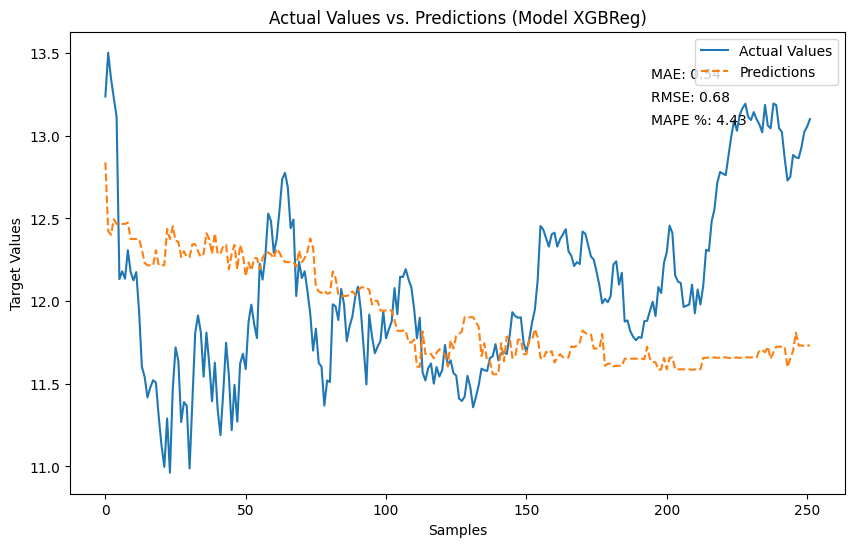

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values,label="Actual Values")
plt.plot(y_pred,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions (Model XGBReg)")
plt.text(0.75, 0.9 , f"MAE: {mae:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.85 , f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.80 , f"MAPE %: {mape:.2f}", transform=plt.gca().transAxes)
plt.show()


In [28]:
from catboost import CatBoostRegressor
model_catB=CatBoostRegressor(iterations=25,learning_rate=0.02,depth=3, verbose=0)

model_catB.fit(X_train, y_train)

y_pred=model_catB.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mape=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
print(f"Mean Squared Error (MSE): {mse}")
print(f"RMSE: {rmse}")


MAPE: 5.79%
Mean Squared Error (MSE): 0.7797718339039765
RMSE: 0.8830469035696669


In [29]:
def calculate_mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
model_hist=HistGradientBoostingRegressor(learning_rate=0.1,
    max_iter=7700,
    max_leaf_nodes=5,
    max_depth=7,
    min_samples_leaf=5,
    l2_regularization=2,
    early_stopping=True,
                                         
)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=False)
model_hist.fit(X_train,y_train)
y_pred=model_hist.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
n=len(y_test)  
p=X_test.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape=calculate_mape(y_test,y_pred)

explained_variance=explained_variance_score(y_test, y_pred)
y_pred_hist=y_pred

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Explained Variance Score: {explained_variance:.4f}')
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 0.6587
Root Mean Squared Error (RMSE): 0.8116
Mean Absolute Error (MAE): 0.6742
R²: -1.3260
Adjusted R²: -1.4530
Explained Variance Score: -1.3167
Mean Absolute Percentage Error (MAPE): 5.5658%


In [30]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X=df_imputed.drop('WMT', axis=1)
y=df_imputed['WMT']

scaler=MinMaxScaler(feature_range=(0, 1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.0762 - val_loss: 0.1286
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0172 - val_loss: 0.0829
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0136 - val_loss: 0.1054
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0111 - val_loss: 0.1090
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0085 - val_loss: 0.1088
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0063 - val_loss: 0.1161
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0069 - val_loss: 0.1329
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0059 - val_loss: 0.1263
Epoch 9/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0053 - val_loss: 0.0870
Epoch 10/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0050 - val_loss: 0.0861
Epoch 11/

<Figure size 1400x700 with 0 Axes>

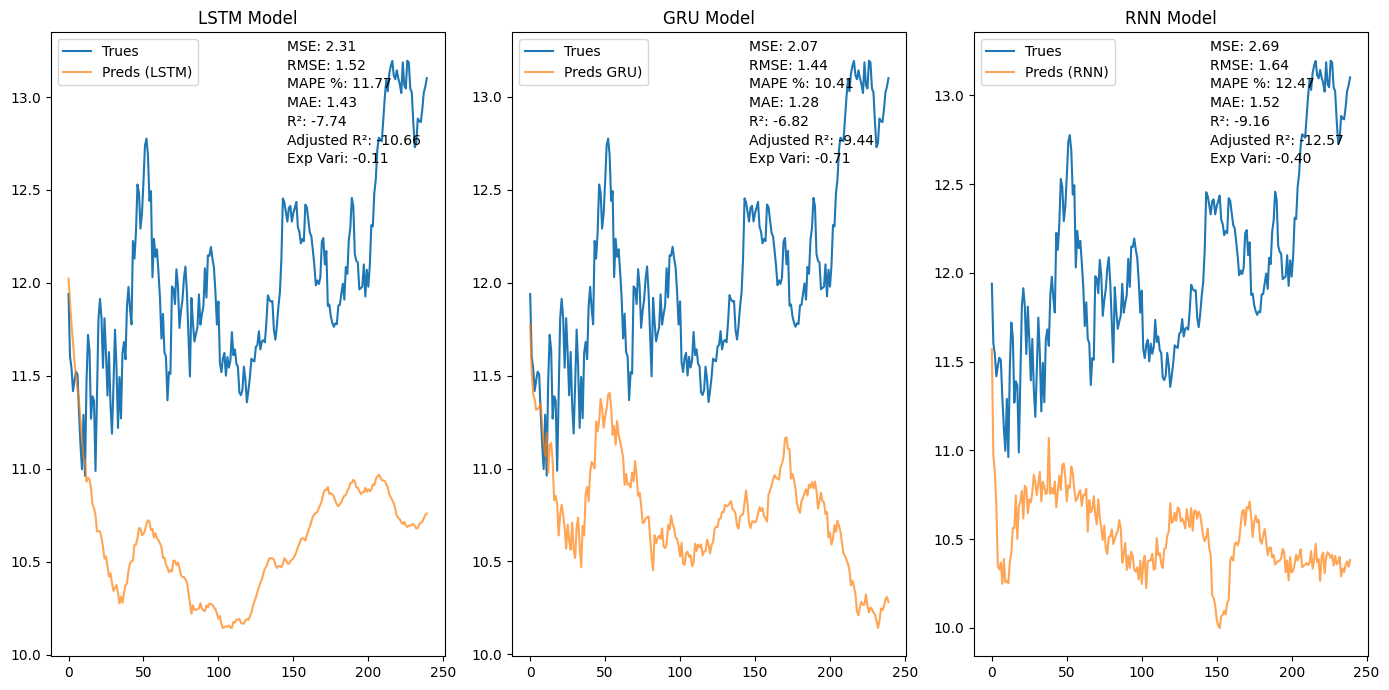

In [31]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()


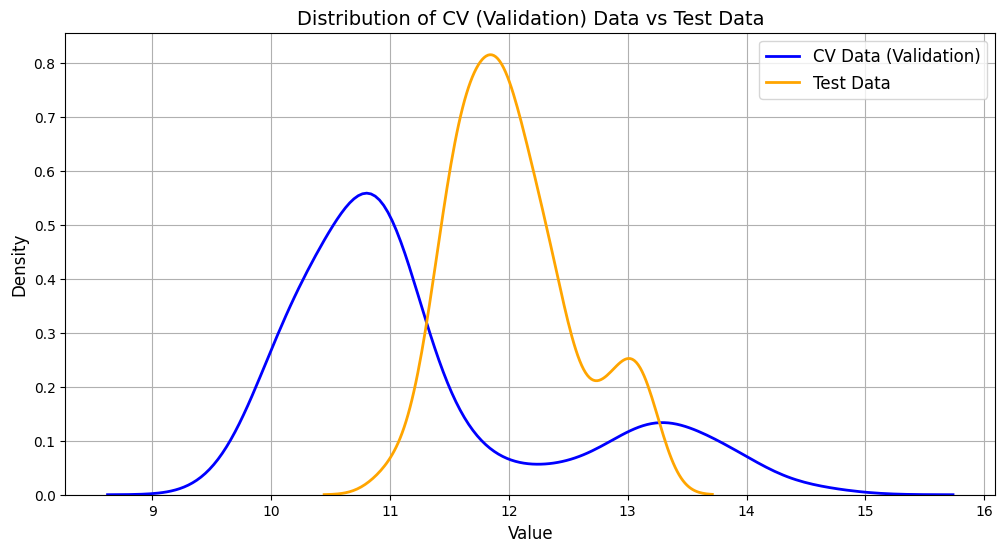

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test_inverse=scaler.inverse_transform(y_test)
y_train_inverse=scaler.inverse_transform(y_train)


plt.figure(figsize=(12, 6))
sns.kdeplot(y_train_inverse.flatten(), label="CV Data (Validation)", color="blue", linewidth=2)
sns.kdeplot(y_test_inverse.flatten(), label="Test Data", color="orange", linewidth=2)
plt.title("Distribution of CV (Validation) Data vs Test Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [33]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X=df_imputed.drop('WMT', axis=1)
y=df_imputed['WMT']

scaler=MinMaxScaler(feature_range=(0, 1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
34/34 [==============================] - 3s 52ms/step - loss: 0.0446 - val_loss: 0.0041
Epoch 2/20
34/34 [==============================] - 1s 35ms/step - loss: 0.0158 - val_loss: 0.0141
Epoch 3/20
34/34 [==============================] - 1s 37ms/step - loss: 0.0119 - val_loss: 0.0165
Epoch 4/20
34/34 [==============================] - 1s 36ms/step - loss: 0.0080 - val_loss: 0.0284
Epoch 5/20
34/34 [==============================] - 1s 37ms/step - loss: 0.0060 - val_loss: 0.0258
Epoch 6/20
34/34 [==============================] - 1s 37ms/step - loss: 0.0054 - val_loss: 0.0290
Epoch 7/20
34/34 [==============================] - 1s 37ms/step - loss: 0.0054 - val_loss: 0.0247
Epoch 8/20
34/34 [==============================] - 1s 36ms/step - loss: 0.0050 - val_loss: 0.0312
Epoch 9/20
34/34 [==============================] - 1s 36ms/step - loss: 0.0050 - val_loss: 0.0380
Epoch 10/20
34/34 [==============================] - 1s 37ms/step - loss: 0.0044 - val_loss: 0.0313
Epoch 11/

<Figure size 1400x700 with 0 Axes>

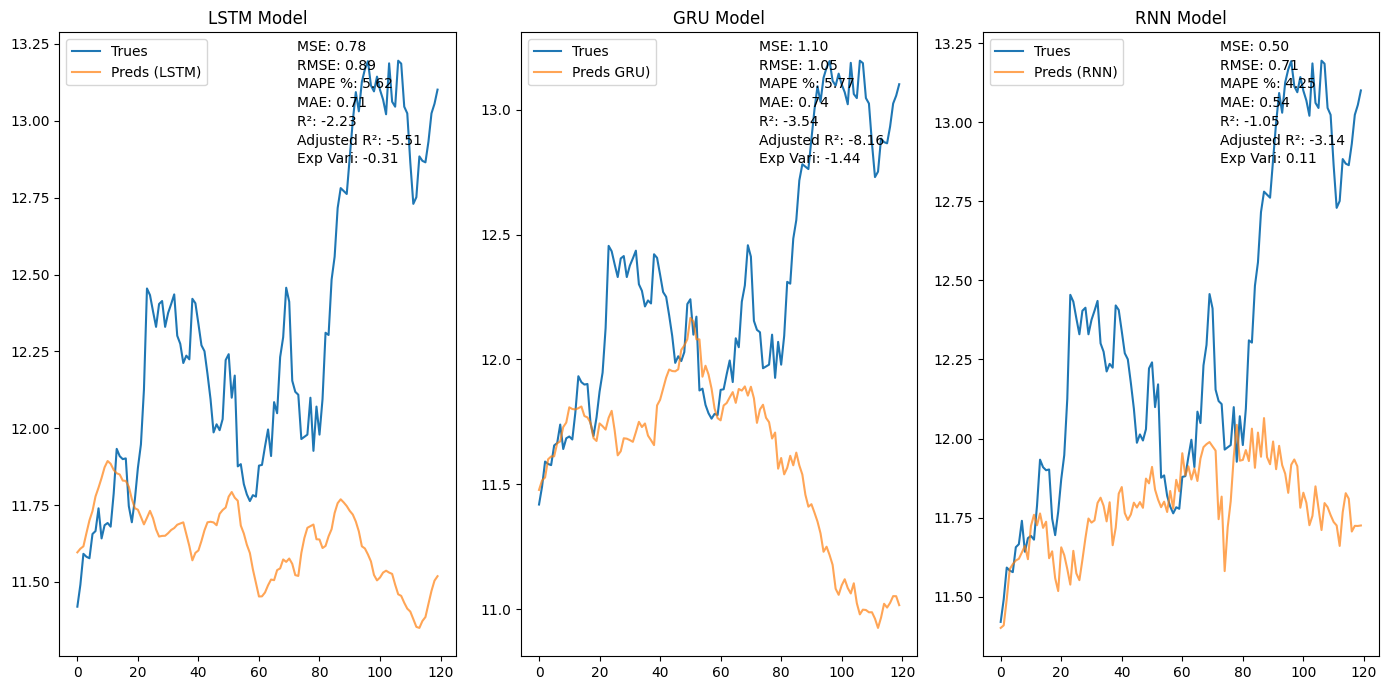

In [34]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()

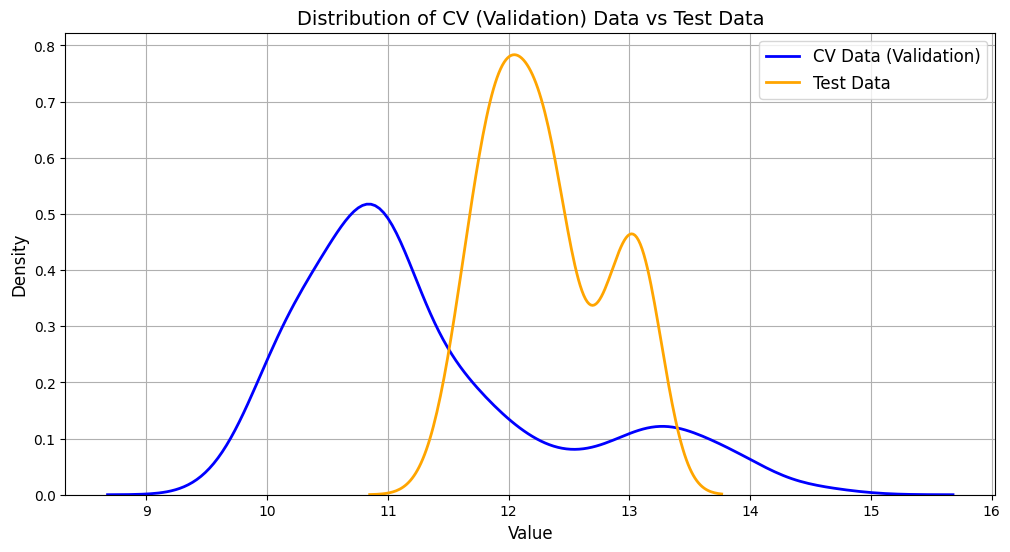

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test_inverse=scaler.inverse_transform(y_test)
y_train_inverse=scaler.inverse_transform(y_train)


plt.figure(figsize=(12, 6))
sns.kdeplot(y_train_inverse.flatten(), label="CV Data (Validation)", color="blue", linewidth=2)
sns.kdeplot(y_test_inverse.flatten(), label="Test Data", color="orange", linewidth=2)
plt.title("Distribution of CV (Validation) Data vs Test Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

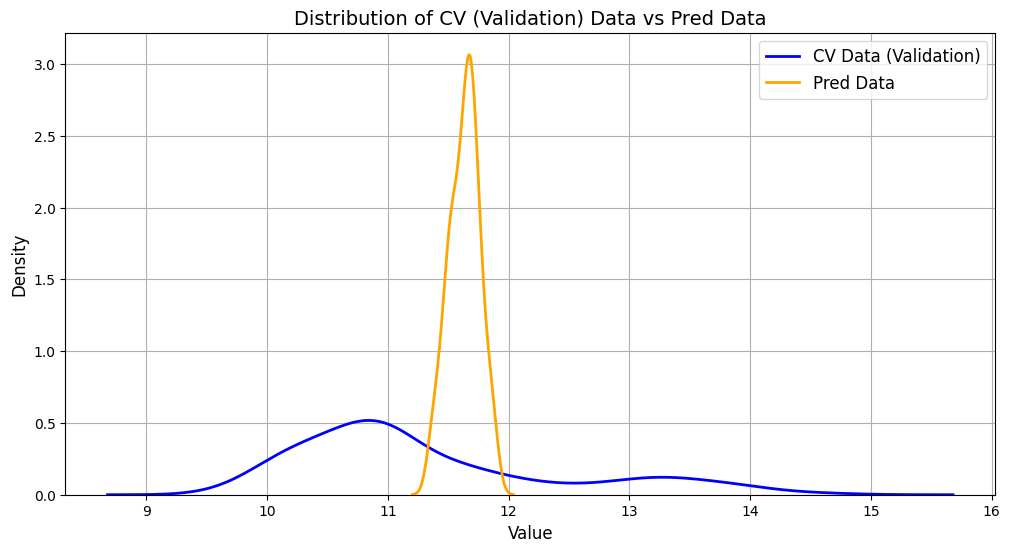

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test_inverse=scaler.inverse_transform(y_test)
y_pred_lstm_invers=scaler.inverse_transform(y_pred_lstm)


plt.figure(figsize=(12, 6))
sns.kdeplot(y_train_inverse.flatten(), label="CV Data (Validation)", color="blue", linewidth=2)
sns.kdeplot(y_pred_lstm_invers.flatten(), label="Pred Data", color="orange", linewidth=2)
plt.title("Distribution of CV (Validation) Data vs Pred Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [37]:
df["rolling_mean_60"]=df["WMT"].rolling(window=60).mean()

In [38]:
rolling_mean = df['WMT'].rolling(window=20).mean()
rolling_std = df['WMT'].rolling(window=20).std()
df['upper_band'] = rolling_mean + (rolling_std * 2)
df['lower_band'] = rolling_mean - (rolling_std * 2)
delta = df['WMT'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
ema_12 = df['WMT'].ewm(span=12, adjust=False).mean()
ema_26 = df['WMT'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['momentum'] = df['WMT'] - df['WMT'].shift(10)
high_14 = df['WMT'].rolling(window=14).max()
low_14 = df['WMT'].rolling(window=14).min()
df['stochastic'] = 100 * ((df['WMT'] - low_14) / (high_14 - low_14))


<Axes: >

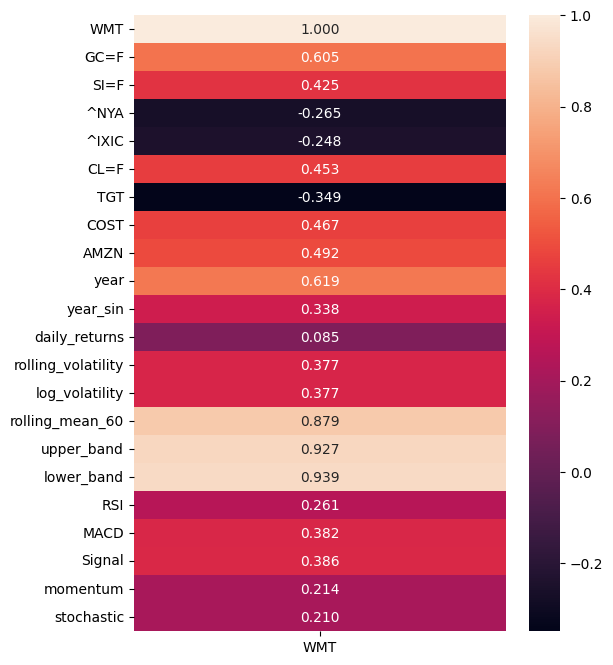

In [39]:
corr_matrix=df.corr()
plt.figure(figsize=(6,8))
sns.heatmap(data=corr_matrix["WMT"].to_frame(),annot=True,fmt=".3f")

In [40]:
import tensorflow as tf
tf.random.set_seed(42)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


X=df_imputed.drop('WMT', axis=1)
y=df_imputed['WMT']

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.4, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    

    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=50, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=26, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=22, batch_size=26, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
15/15 [==============================] - 3s 78ms/step - loss: 0.0136 - val_loss: 0.2897
Epoch 2/20
15/15 [==============================] - 1s 38ms/step - loss: 0.0049 - val_loss: 0.1822
Epoch 3/20
15/15 [==============================] - 1s 40ms/step - loss: 0.0028 - val_loss: 0.1103
Epoch 4/20
15/15 [==============================] - 1s 41ms/step - loss: 0.0019 - val_loss: 0.0756
Epoch 5/20
15/15 [==============================] - 1s 39ms/step - loss: 0.0013 - val_loss: 0.0502
Epoch 6/20
15/15 [==============================] - 1s 38ms/step - loss: 9.6349e-04 - val_loss: 0.0397
Epoch 7/20
15/15 [==============================] - 1s 40ms/step - loss: 9.1675e-04 - val_loss: 0.0311
Epoch 8/20
15/15 [==============================] - 1s 41ms/step - loss: 9.0415e-04 - val_loss: 0.0286
Epoch 9/20
15/15 [==============================] - 1s 42ms/step - loss: 7.5496e-04 - val_loss: 0.0217
Epoch 10/20
15/15 [==============================] - 1s 41ms/step - loss: 7.0703e-04 - val_lo

<Figure size 1400x700 with 0 Axes>

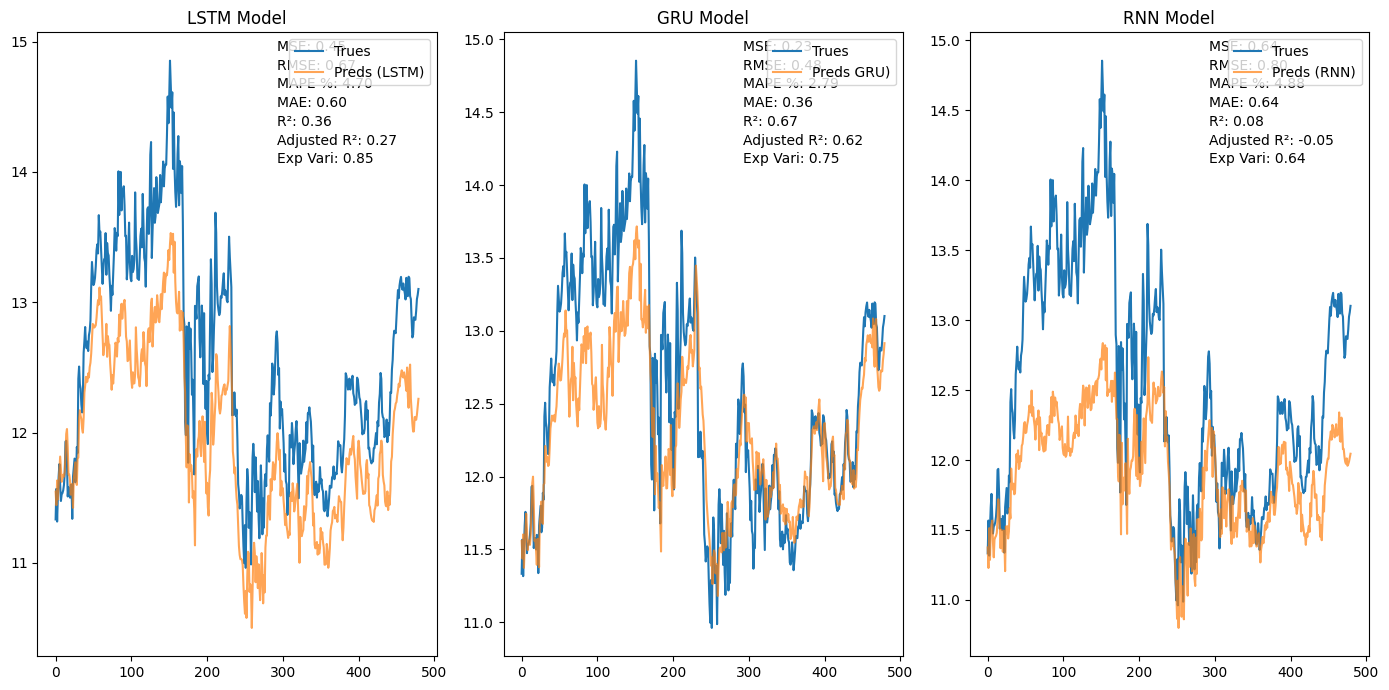

In [41]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()

Text(0.55, 0.79, 'Exp Vari: 0.85')

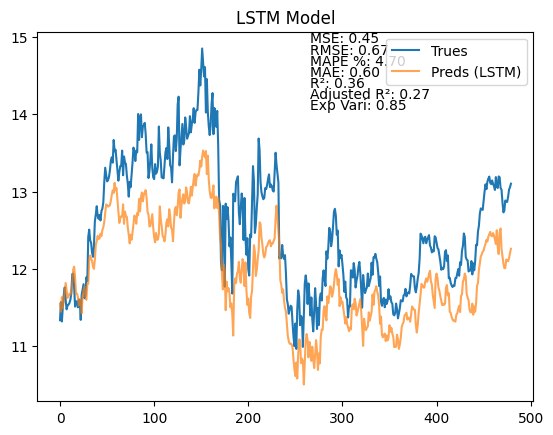

In [42]:
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model")
plt.legend()
plt.text(0.55,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.55,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


23/23 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'LSTM Model (test data)')

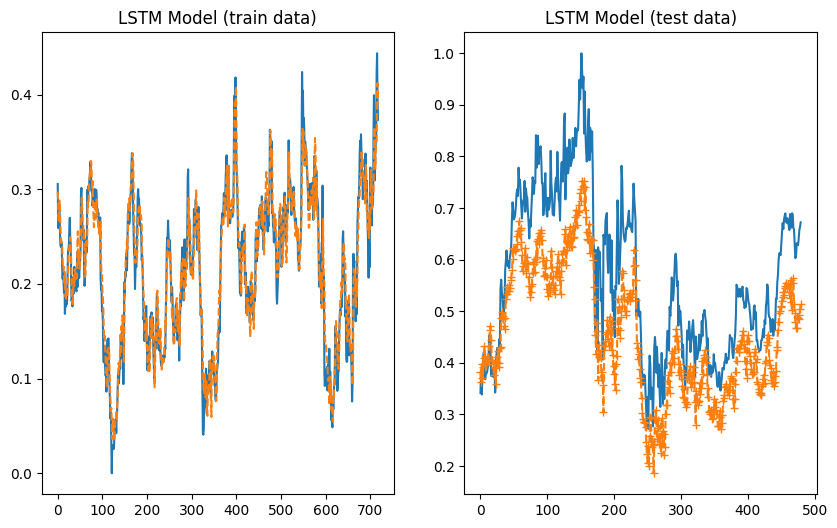

In [43]:
y_pred_train_lstm=lstm_model.predict(X_train)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(y_train)
plt.plot(y_pred_train_lstm,linestyle="--")
plt.title("LSTM Model (train data)")
plt.subplot(1,2,2)
plt.plot(y_test)
plt.plot(y_pred_lstm,linestyle="--",marker="+")
plt.title("LSTM Model (test data)")

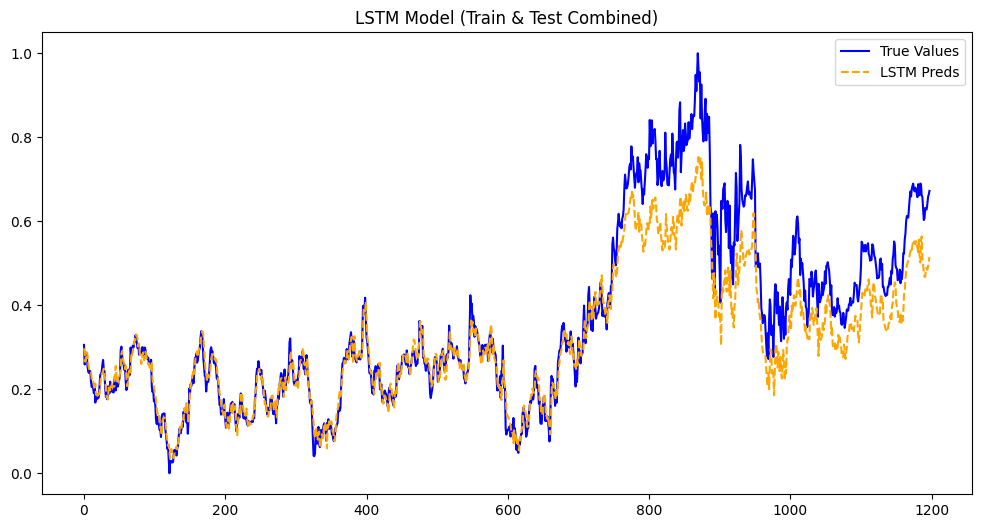

In [44]:
y_combined = np.concatenate((y_train, y_test), axis=0)
y_pred_combined = np.concatenate((y_pred_train_lstm, y_pred_lstm), axis=0)


plt.figure(figsize=(12,6))
plt.plot(y_combined, label='True Values', color='blue')
plt.plot(y_pred_combined, linestyle='--', label='LSTM Preds', color='orange')

plt.title('LSTM Model (Train & Test Combined)')
plt.legend()
plt.show()

In [45]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WMT                 1258 non-null   float64
 1   GC=F                1258 non-null   float64
 2   SI=F                1258 non-null   float64
 3   ^NYA                1258 non-null   float64
 4   ^IXIC               1258 non-null   float64
 5   CL=F                1258 non-null   float64
 6   TGT                 1258 non-null   float64
 7   COST                1258 non-null   float64
 8   AMZN                1258 non-null   float64
 9   year                1258 non-null   float64
 10  year_sin            1258 non-null   float64
 11  daily_returns       1258 non-null   float64
 12  rolling_volatility  1258 non-null   float64
 13  log_volatility      1258 non-null   float64
 14  rolling_mean_60     1258 non-null   float64
 15  upper_band          1258 non-null   float64
 16  lower_

In [46]:
df_2008=df_imputed[df_imputed["year"]==2008.]
df_1=df_imputed[df_imputed["year"]!=2008.]

In [47]:
corr_matrix=df_2008.corr()
corr_matrix=corr_matrix["WMT"].to_frame()
corr_matrix1=df_1.corr()
corr_matrix1=corr_matrix1["WMT"].to_frame()


C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


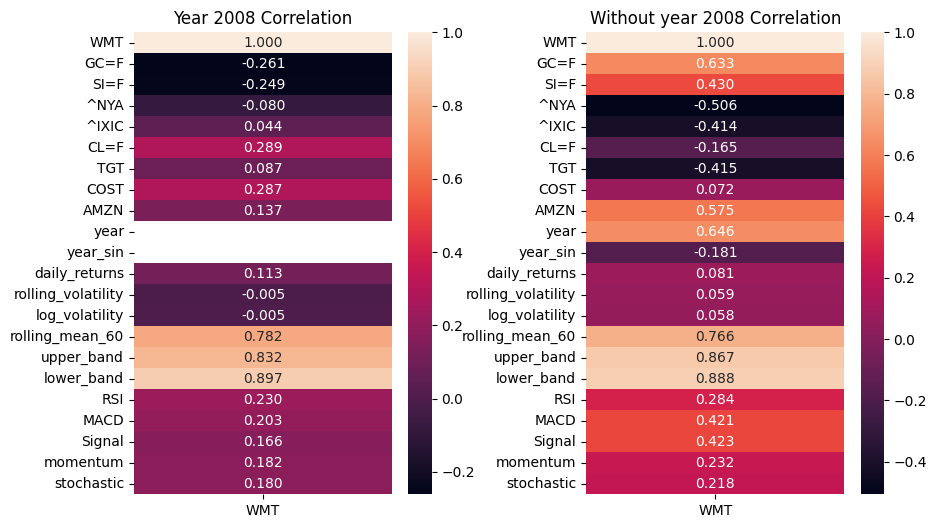

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Year 2008 Correlation")
sns.heatmap(data=corr_matrix,annot=True,fmt=".3f")
plt.subplot(1,2,2)
plt.title("Without year 2008 Correlation")
sns.heatmap(data=corr_matrix1,annot=True,fmt=".3f")
plt.subplots_adjust(wspace=0.4)

In [49]:
import tensorflow as tf
tf.random.set_seed(42)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


X=df_2008.drop('WMT', axis=1)
y=df_2008['WMT']

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=20, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=20, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=22, batch_size=20, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
7/7 [==============================] - 2s 129ms/step - loss: 0.4909 - val_loss: 0.1068
Epoch 2/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0473 - val_loss: 0.0547
Epoch 3/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0764 - val_loss: 0.0357
Epoch 4/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0175 - val_loss: 0.0454
Epoch 5/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0211 - val_loss: 0.0489
Epoch 6/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0170 - val_loss: 0.0347
Epoch 7/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0106 - val_loss: 0.0307
Epoch 8/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0103 - val_loss: 0.0309
Epoch 9/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0085 - val_loss: 0.0315
Epoch 10/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0075 - val_loss: 0.0321
Epoch 11/20
7/7 [===========

<Figure size 1400x700 with 0 Axes>

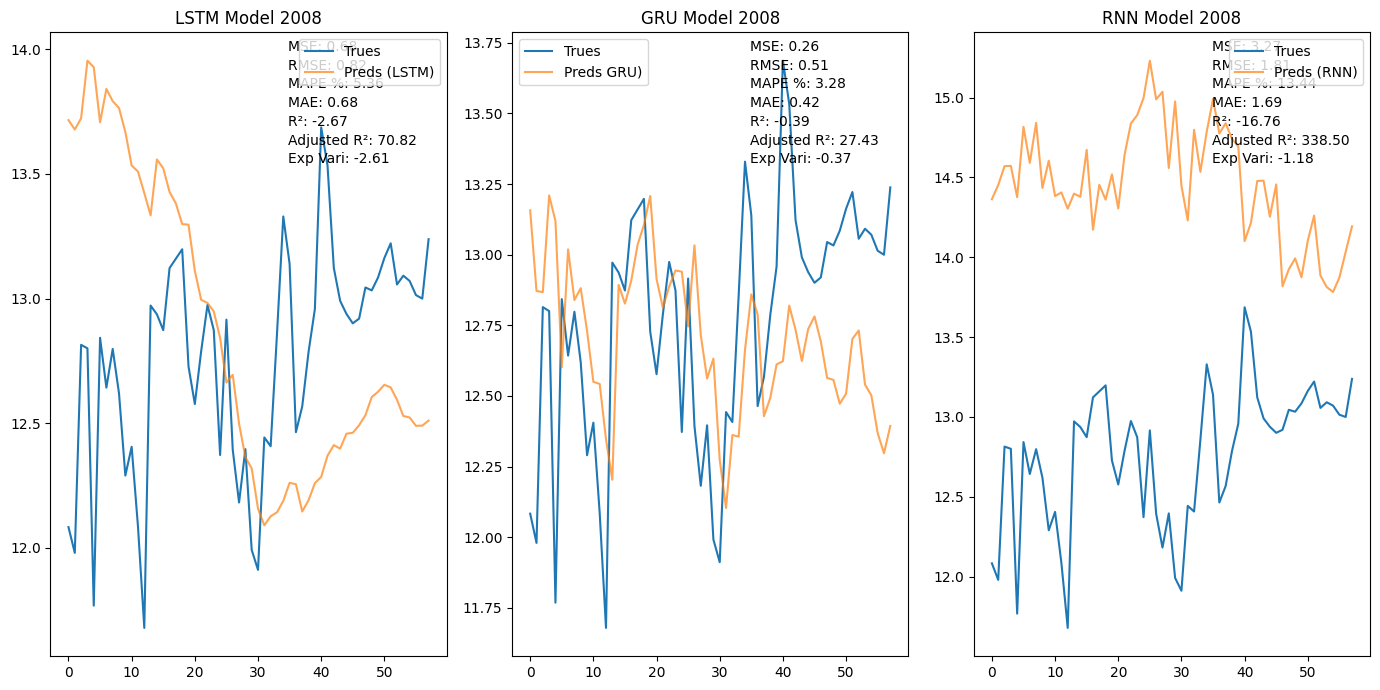

In [50]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()

In [51]:
import tensorflow as tf
tf.random.set_seed(42)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


X=df_1.drop('WMT', axis=1)
y=df_1['WMT']

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=26, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=26, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=22, batch_size=26, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
30/30 [==============================] - 3s 41ms/step - loss: 0.0088 - val_loss: 0.0234
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0052 - val_loss: 0.0091
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0036 - val_loss: 0.0080
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0032 - val_loss: 0.0083
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0030 - val_loss: 0.0068
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0026 - val_loss: 0.0058
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 9/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 10/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 11/

<Figure size 1400x700 with 0 Axes>

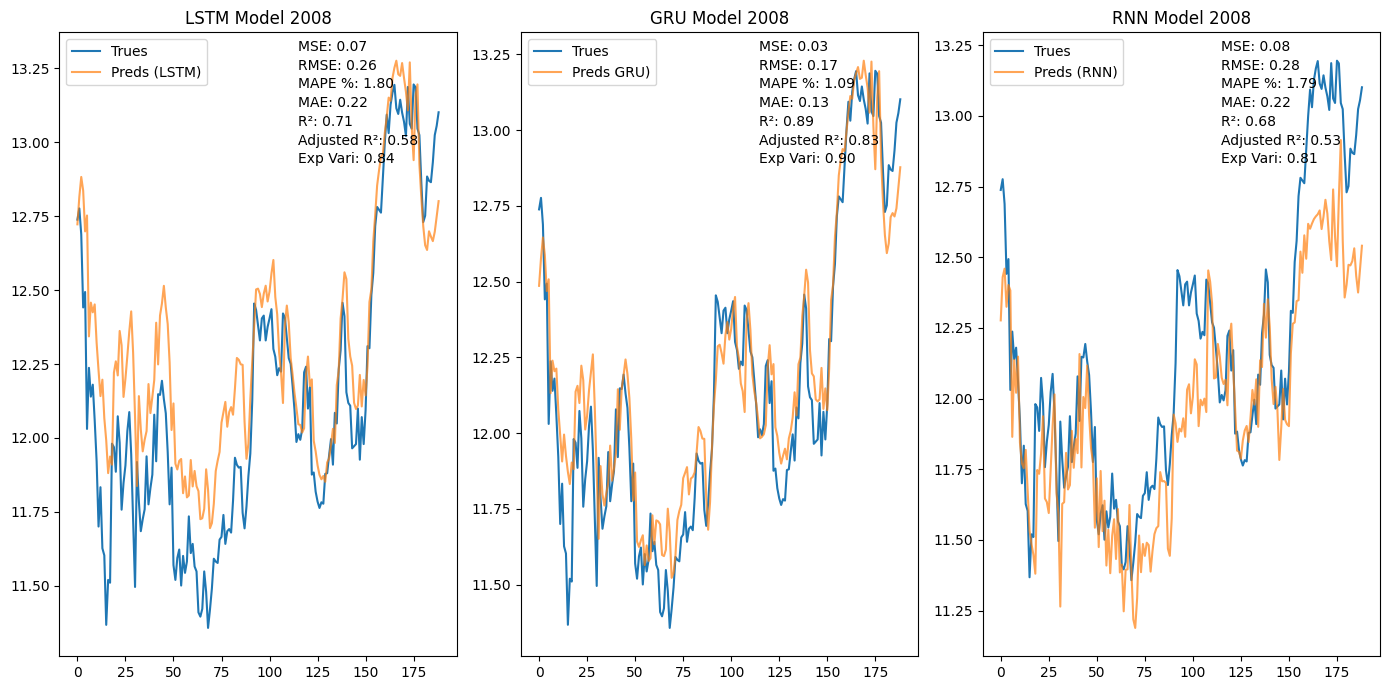

In [52]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()

In [53]:
for i in df_2008:
    
    skews=df_2008[i].skew()
    print(f"skew value of {i}:,{skews}")

skew value of WMT:,-0.494483834879843
skew value of GC=F:,-0.5532105517595757
skew value of SI=F:,-0.39202782047047596
skew value of ^NYA:,-0.9459655138804329
skew value of ^IXIC:,-1.0513205338503717
skew value of CL=F:,-0.6525082896964864
skew value of TGT:,-0.983256344901172
skew value of COST:,-0.7702567398499305
skew value of AMZN:,-0.8718388718322311
skew value of year:,0
skew value of year_sin:,0
skew value of daily_returns:,0.5676094576060565
skew value of rolling_volatility:,1.3960791460199182
skew value of log_volatility:,1.3860618029015217
skew value of rolling_mean_60:,-0.6136810507609967
skew value of upper_band:,-0.5751377910368821
skew value of lower_band:,-0.2196741092654708
skew value of RSI:,0.04362864607748436
skew value of MACD:,-1.0798423151624115
skew value of Signal:,-0.9885027147634965
skew value of momentum:,-0.8971908615084767
skew value of stochastic:,-0.18394096269859223


In [54]:
for i in df_1:
    
    skews=df_1[i].skew()
    print(f"skew value of {i}:,{skews}")

skew value of WMT:,0.6460287314458746
skew value of GC=F:,0.5651537486797716
skew value of SI=F:,-0.14081109175692305
skew value of ^NYA:,-0.25228295298377773
skew value of ^IXIC:,-0.44328575918228064
skew value of CL=F:,0.3078456503324516
skew value of TGT:,-0.6682500250104831
skew value of COST:,0.5474207448001026
skew value of AMZN:,1.0760096654160192
skew value of year:,0.43649583232308903
skew value of year_sin:,0
skew value of daily_returns:,0.10276165810048363
skew value of rolling_volatility:,1.3911872223462984
skew value of log_volatility:,1.3822500854962458
skew value of rolling_mean_60:,0.8792630574176339
skew value of upper_band:,0.8045087954186184
skew value of lower_band:,0.6967781153294165
skew value of RSI:,0.14244847923630172
skew value of MACD:,-0.21953270119941917
skew value of Signal:,-0.2525302919676318
skew value of momentum:,-0.21916254581844086
skew value of stochastic:,0.1194361532703436


In [55]:
X=df_2008.drop('WMT', axis=1)
y=df_2008['WMT']

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    

    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=50, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=26, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=22, batch_size=26, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
4/4 [==============================] - 2s 221ms/step - loss: 0.2888 - val_loss: 0.0562
Epoch 2/20
4/4 [==============================] - 0s 38ms/step - loss: 0.0493 - val_loss: 0.0177
Epoch 3/20
4/4 [==============================] - 0s 46ms/step - loss: 0.0500 - val_loss: 0.0212
Epoch 4/20
4/4 [==============================] - 0s 62ms/step - loss: 0.0073 - val_loss: 0.0347
Epoch 5/20
4/4 [==============================] - 0s 51ms/step - loss: 0.0212 - val_loss: 0.0297
Epoch 6/20
4/4 [==============================] - 0s 56ms/step - loss: 0.0162 - val_loss: 0.0161
Epoch 7/20
4/4 [==============================] - 0s 48ms/step - loss: 0.0071 - val_loss: 0.0167
Epoch 8/20
4/4 [==============================] - 0s 48ms/step - loss: 0.0121 - val_loss: 0.0182
Epoch 9/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0108 - val_loss: 0.0150
Epoch 10/20
4/4 [==============================] - 0s 49ms/step - loss: 0.0066 - val_loss: 0.0155
Epoch 11/20
4/4 [===========

<Figure size 1400x700 with 0 Axes>

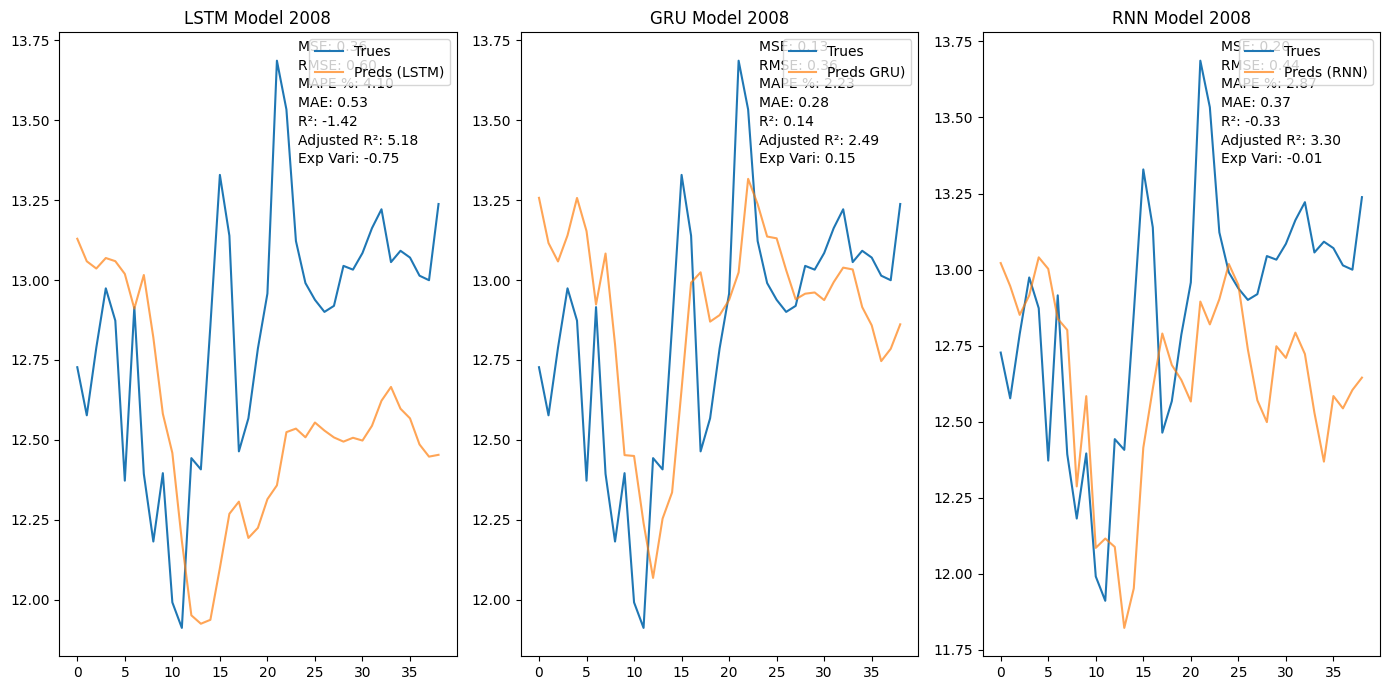

In [56]:
plt.figure(figsize=(14, 7))


plt.tight_layout()

y_test_orig=scaler.inverse_transform(y_test)
y_pred_lstm_orig=scaler.inverse_transform(y_pred_lstm)
y_pred_gru_orig=scaler.inverse_transform(y_pred_gru)
y_pred_rnn_orig=scaler.inverse_transform(y_pred_rnn)

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  


plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)


plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model 2008")
plt.legend()
plt.text(0.6,0.97,f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.94,f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.91,f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.88,f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.85,f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.82,f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6,0.79,f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


plt.show()

In [57]:
df

,WMT,GC=F,SI=F,^NYA,^IXIC,CL=F,TGT,COST,AMZN,year,...,rolling_volatility,log_volatility,rolling_mean_60,upper_band,lower_band,RSI,MACD,Signal,momentum,stochastic
0,11.826299,428.700012,6.477000,7179.709961,2152.149902,42.119999,32.691017,32.364006,2.2260,2005,...,0.007074,0.007049,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
1,11.797480,428.500000,6.427000,7090.520020,2107.860107,43.910000,32.337597,31.782925,2.1070,2005,...,0.007074,0.007049,NaN,NaN,NaN,NaN,-0.002299,-0.000460,NaN,NaN
2,11.813000,426.600006,6.512000,7055.209961,2091.239990,43.389999,32.362839,31.904539,2.0885,2005,...,0.007074,0.007049,NaN,NaN,NaN,NaN,-0.002836,-0.000935,NaN,NaN
3,11.981468,421.000000,6.433000,7076.939941,2090.000000,45.560001,30.608385,32.364006,2.0525,2005,...,0.007074,0.007049,NaN,NaN,NaN,NaN,0.010215,0.001295,NaN,NaN
4,11.968167,418.899994,6.429000,7057.509766,2088.610107,45.430000,30.936562,32.086967,2.1160,2005,...,0.007074,0.007049,NaN,NaN,NaN,NaN,0.019262,0.004888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12.864861,1091.500000,17.091000,7217.200195,2269.639893,78.050003,32.557110,42.805447,6.9470,2009,...,0.007033,0.007009,12.535793,13.314016,12.730916,41.066778,0.030812,0.087947,-0.180959,29.015233
1254,12.932424,1091.500000,16.778999,7255.000000,2285.689941,78.769997,32.423813,43.040604,6.9235,2009,...,0.006730,0.006707,12.554919,13.291860,12.726912,46.184869,0.029307,0.076219,-0.262984,43.524181
1255,13.024106,1091.500000,16.778999,7261.240234,2291.080078,78.870003,32.290508,43.154598,6.9655,2009,...,0.006785,0.006762,12.575934,13.283080,12.726623,42.530509,0.035108,0.067997,-0.161660,63.212965
1256,13.055470,1091.500000,16.778999,7252.189941,2288.399902,79.279999,32.377155,42.940830,6.9705,2009,...,0.006787,0.006764,12.597151,13.278888,12.726801,49.672594,0.041755,0.062748,0.009649,69.948267


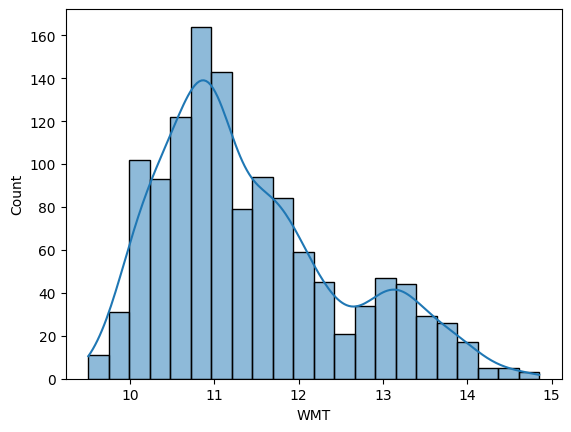

In [58]:
sns.histplot(df["WMT"], kde=True)
plt.show()

In [59]:
df["WMT"]=np.log1p(df["WMT"])

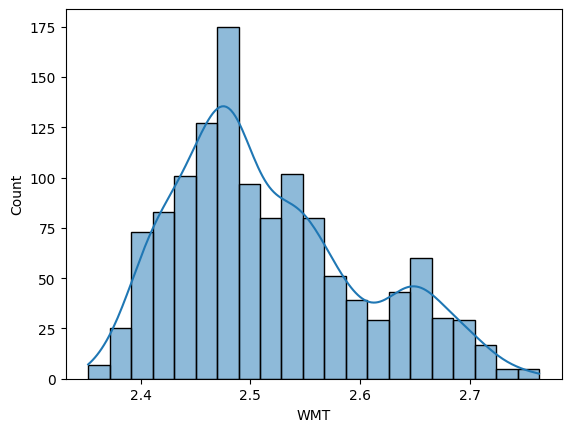

In [60]:
sns.histplot(df["WMT"], kde=True)
plt.show()

In [61]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
X=df_imputed.drop('WMT', axis=1)
y=df_imputed['WMT']


scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequence(X, y, time_steps=60):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i, :])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequence(X_scaled, y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False,random_state=42)


def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    
 
    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    

    model.compile(optimizer=Adam(learning_rate=0.008), loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])

lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)
rnn_model = create_rnn_model(input_shape)


history_lstm = lstm_model.fit(X_train, y_train,epochs=20, batch_size=50, validation_data=(X_test, y_test), verbose=1)

history_gru = gru_model.fit(X_train, y_train,epochs=20, batch_size=26, validation_data=(X_test, y_test), verbose=1)

history_rnn = rnn_model.fit(X_train, y_train, epochs=22, batch_size=26, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test)

y_pred_gru = gru_model.predict(X_test)

y_pred_rnn = rnn_model.predict(X_test)

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f"LSTM MSE: {mse_lstm}")
print(f"GRU MSE: {mse_gru}")
print(f"RNN MSE: {mse_rnn}")

Epoch 1/20
20/20 [==============================] - 3s 58ms/step - loss: 0.0295 - val_loss: 0.0061
Epoch 2/20
20/20 [==============================] - 1s 32ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 3/20
20/20 [==============================] - 1s 33ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/20
20/20 [==============================] - 1s 34ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 5/20
20/20 [==============================] - 1s 36ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/20
20/20 [==============================] - 1s 34ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 7/20
20/20 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 8/20
20/20 [==============================] - 1s 34ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/20
20/20 [==============================] - 1s 34ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/20
20/20 [==============================] - 1s 34ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 11/

<Figure size 1400x700 with 0 Axes>

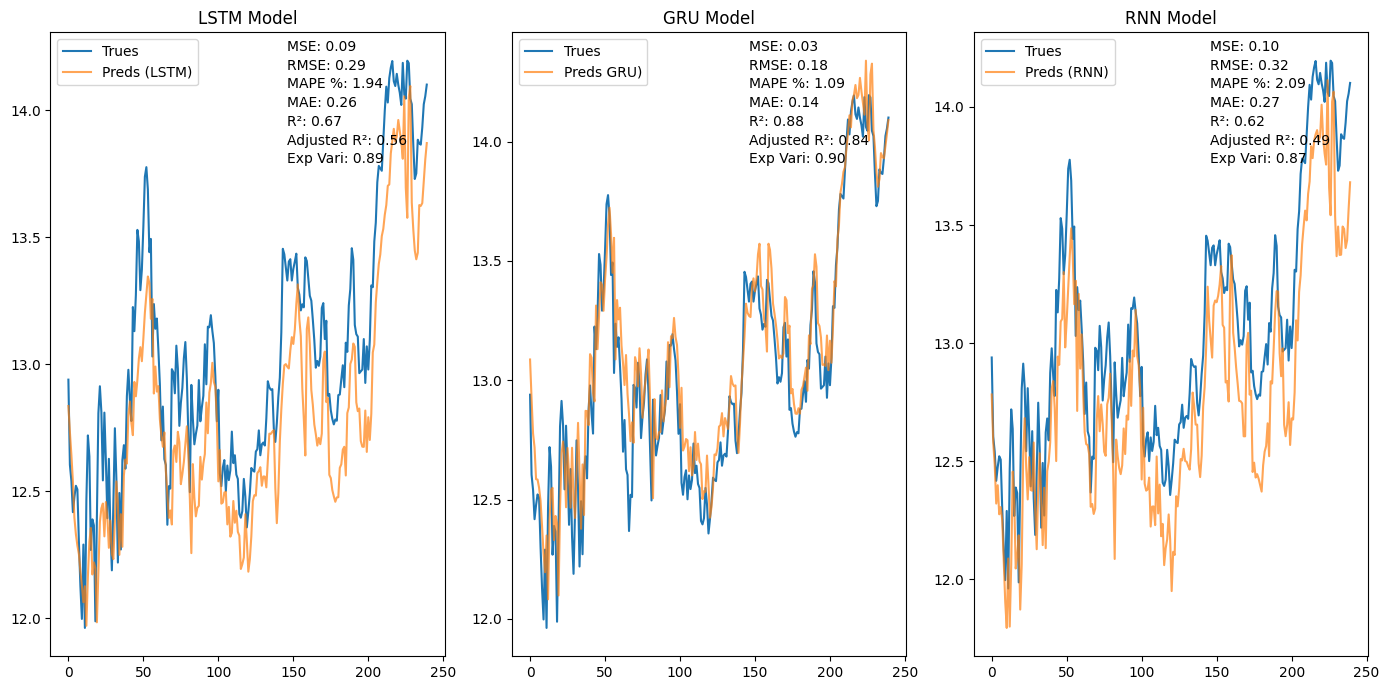

In [63]:
plt.figure(figsize=(14, 7))

y_test_orig_inv = scaler.inverse_transform(y_test)  
y_pred_lstm_orig_inv = scaler.inverse_transform(y_pred_lstm)   
y_pred_gru_orig_inv = scaler.inverse_transform(y_pred_gru) 
y_pred_rnn_orig_inv = scaler.inverse_transform(y_pred_rnn) 

y_test_orig_inv = np.exp(y_test_orig_inv)
y_pred_lstm_orig_inv =np.exp(y_pred_lstm_orig_inv)
y_pred_gru_orig_inv =np.exp(y_pred_gru_orig_inv)
y_pred_rnn_orig_inv = np.exp(y_pred_rnn_orig_inv)

y_test_orig = y_test_orig_inv
y_pred_lstm_orig = y_pred_lstm_orig_inv
y_pred_gru_orig = y_pred_gru_orig_inv
y_pred_rnn_orig = y_pred_rnn_orig_inv

mse = mean_squared_error(y_test_orig, y_pred_lstm_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_lstm_orig)  
r2 = r2_score(y_test_orig, y_pred_lstm_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  

plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_lstm_orig, label="Preds (LSTM)", alpha=0.7)
plt.title("LSTM Model")
plt.legend()
plt.text(0.6, 0.97, f"MSE: {mean_squared_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.94, f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_lstm_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.91, f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_lstm_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.88, f"MAE: {mean_absolute_error(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f"R²: {r2_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.82, f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_lstm_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.79, f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_lstm_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1, 3, 2)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_gru_orig, label="Preds GRU)", alpha=0.7)
plt.title("GRU Model")
plt.legend()
plt.text(0.6, 0.97, f"MSE: {mean_squared_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.94, f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_gru_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.91, f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.88, f"MAE: {mean_absolute_error(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f"R²: {r2_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.82, f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_gru_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.79, f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_gru_orig):.2f}", transform=plt.gca().transAxes)

plt.subplot(1, 3, 3)
plt.plot(y_test_orig, label="Trues")
plt.plot(y_pred_rnn_orig, label="Preds (RNN)", alpha=0.7)
plt.title("RNN Model")
plt.legend()
plt.text(0.6, 0.97, f"MSE: {mean_squared_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.94, f"RMSE: {np.sqrt(mean_squared_error(y_test_orig, y_pred_rnn_orig)):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.91, f"MAPE %: {np.mean(np.abs((y_test_orig - y_pred_rnn_orig) / y_test_orig)) * 100:.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.88, f"MAE: {mean_absolute_error(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f"R²: {r2_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.82, f"Adjusted R²: {1 - (1 - r2_score(y_test_orig, y_pred_rnn_orig)) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1):.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.79, f"Exp Vari: {explained_variance_score(y_test_orig, y_pred_rnn_orig):.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

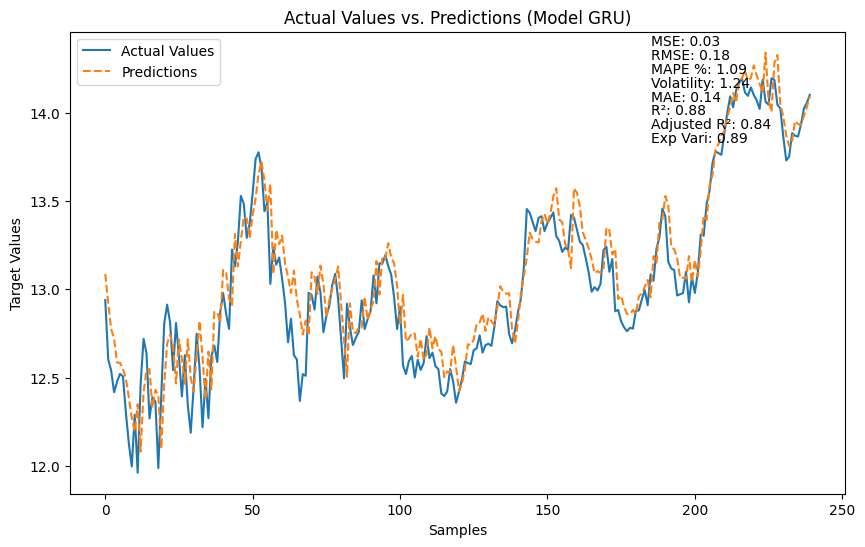

In [66]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
mse = mean_squared_error(y_test_orig, y_pred_gru_orig) 
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test_orig - y_pred_gru_orig) / y_test_orig)) * 100  
mae = mean_absolute_error(y_test_orig, y_pred_gru_orig)  
r2 = r2_score(y_test_orig, y_pred_gru_orig)  
adjusted_r2 = 1 - (1 - r2) * (len(y_test_orig) - 1) / (len(y_test_orig) - X_train.shape[1] - 1)  
explained_variance = explained_variance_score(y_test_orig, y_pred_lstm_orig)  
plt.plot(y_test_orig,label="Actual Values")
plt.plot(y_pred_gru_orig,label="Predictions",linestyle='--')
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Target Values")
plt.title("Actual Values vs. Predictions (Model GRU)")
plt.text(0.75,0.97, f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.94, f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.91, f"MAPE %: {mape:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.88, f"Volatility: {volatility:.2f}", transform=plt.gca().transAxes)
plt.text(0.75,0.85, f"MAE: {mae:.2f}", transform=plt.gca().transAxes)  
plt.text(0.75,0.82, f"R²: {r2:.2f}", transform=plt.gca().transAxes)      
plt.text(0.75,0.79, f"Adjusted R²: {adjusted_r2:.2f}", transform=plt.gca().transAxes)  
plt.text(0.75,0.76, f"Exp Vari: {explained_variance:.2f}", transform=plt.gca().transAxes)  
plt.show()


C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_18860\3134234741.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_orig,label="y_test", color="blue",shade=True, ax=ax[0])
C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_18860\3134234741.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_gru_orig,label="y_pred", color="red",shade=True, ax=ax[0])


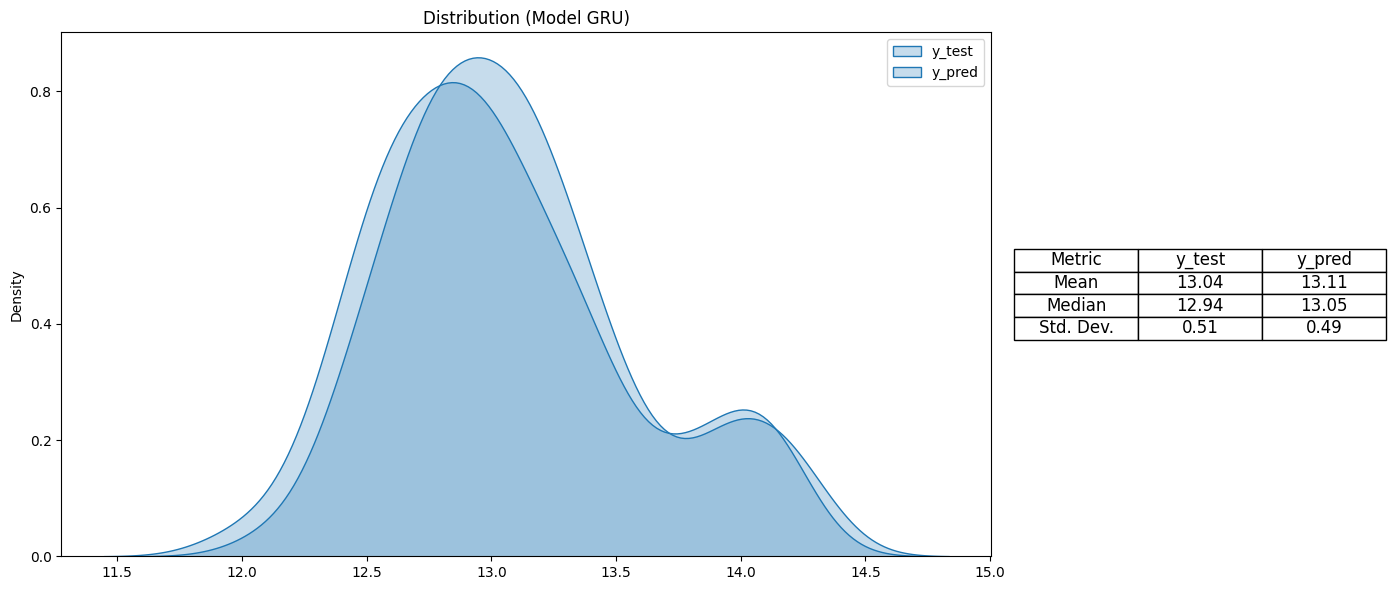

In [68]:

y_test_mean=np.mean(y_test_orig)
y_test_median=np.median(y_test_orig)
y_test_std=np.std(y_test_orig)


y_pred_mean=np.mean(y_pred_gru_orig)
y_pred_median=np.median(y_pred_gru_orig)
y_pred_std=np.std(y_pred_gru_orig)

fig,ax=plt.subplots(1,2,figsize=(14,6), gridspec_kw={"width_ratios":[3, 1]})

sns.kdeplot(y_test_orig,label="y_test", color="blue",shade=True, ax=ax[0])
sns.kdeplot(y_pred_gru_orig,label="y_pred", color="red",shade=True, ax=ax[0])
ax[0].legend()
ax[0].set_title("Distribution (Model GRU)")

stats_table=[
    ["Mean",f"{y_test_mean:.2f}",f"{y_pred_mean:.2f}"],
    ["Median",f"{y_test_median:.2f}",f"{y_pred_median:.2f}"],
    ["Std. Dev.",f"{y_test_std:.2f}",f"{y_pred_std:.2f}"]
]


table = ax[1].table(
    cellText=stats_table,
    colLabels=["Metric", "y_test", "y_pred"],
    loc="center",
    cellLoc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax[1].axis("off")  

plt.tight_layout()
plt.show()

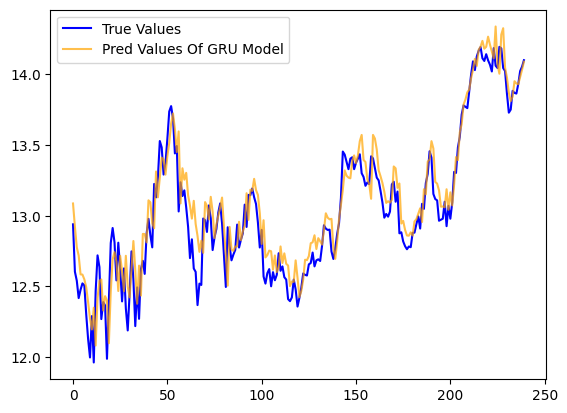

In [69]:
plt.plot(y_test_orig,label="True Values",color="blue")
plt.plot(y_pred_gru_orig,label="Pred Values Of GRU Model",alpha=0.7,color="orange")
plt.legend()  
plt.show() 